# LDAトピックモデルの作成

In [14]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from sklearn.model_selection import train_test_split
import pandas as pd

# 分類するトピック数を設定する。
NUM_TOPICS = 6

# カテゴリ数を取得する。
df = pd.read_csv('es_wakati3.csv')

# 訓練データとtestデータに分ける
train_data, test_data = train_test_split(df, test_size=None, train_size=0.8, stratify=df['業種(大分類)'])

all_data = []

# 訓練データの整形
train_texts = []
train_sentenses = train_data['分かち書き'].values
for row in train_sentenses:
    train_texts.append(row.strip().split(' '))
    all_data.append(row.strip().split(' '))

# テストデータの整形
test_texts = []
test_sentenses = test_data['分かち書き'].values
for row in test_sentenses:
    test_texts.append(row.strip().split(' '))
    
# テストデータの原文の整形
test_original_texts = []
test_original_sentenses = test_data[['業種(大分類)','文章']].values
test_original_sentenses_sen = test_data['文章'].values
test_original_sentenses_cat = test_data['業種(大分類)'].values

for row in test_original_sentenses:
    test_original_texts.append(row[0] + ',"' + row[1] + '"')
    all_data.append(row[0] + ',"' + row[1] + '"')

# 訓練データからモデル作成
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]
lda_model = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# テストデータをモデルに掛ける
score_by_topic = defaultdict(int)
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

# クラスタリング結果を出力
with open('lda_result.csv', 'w') as f:
    for unseen_doc, raw_train_text in zip(test_corpus, test_original_texts):
        f.write(raw_train_text + ',')
        for topic, score in lda_model[unseen_doc]:
            score_by_topic[int(topic)] = float(score)
        for i in range(NUM_TOPICS):
            f.write('{:.2f}'.format(score_by_topic[i]) + ',')
        f.write('\n')

In [29]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from sklearn.model_selection import train_test_split
import pandas as pd

# 分類するトピック数を設定する。
NUM_TOPICS = 6

# カテゴリ数を取得する。
df = pd.read_csv('es_wakati3.csv')

# 訓練データの整形
texts = []
sentenses = df['分かち書き'].values
for row in sentenses:
    texts.append(row.strip().split(' '))

# データからモデル作成
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [ ]:
# LDAによるトピックモデルを参照してみる。

from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('lda_result.csv')
df.head(2)

# LDAトピックモデルのWordCloud

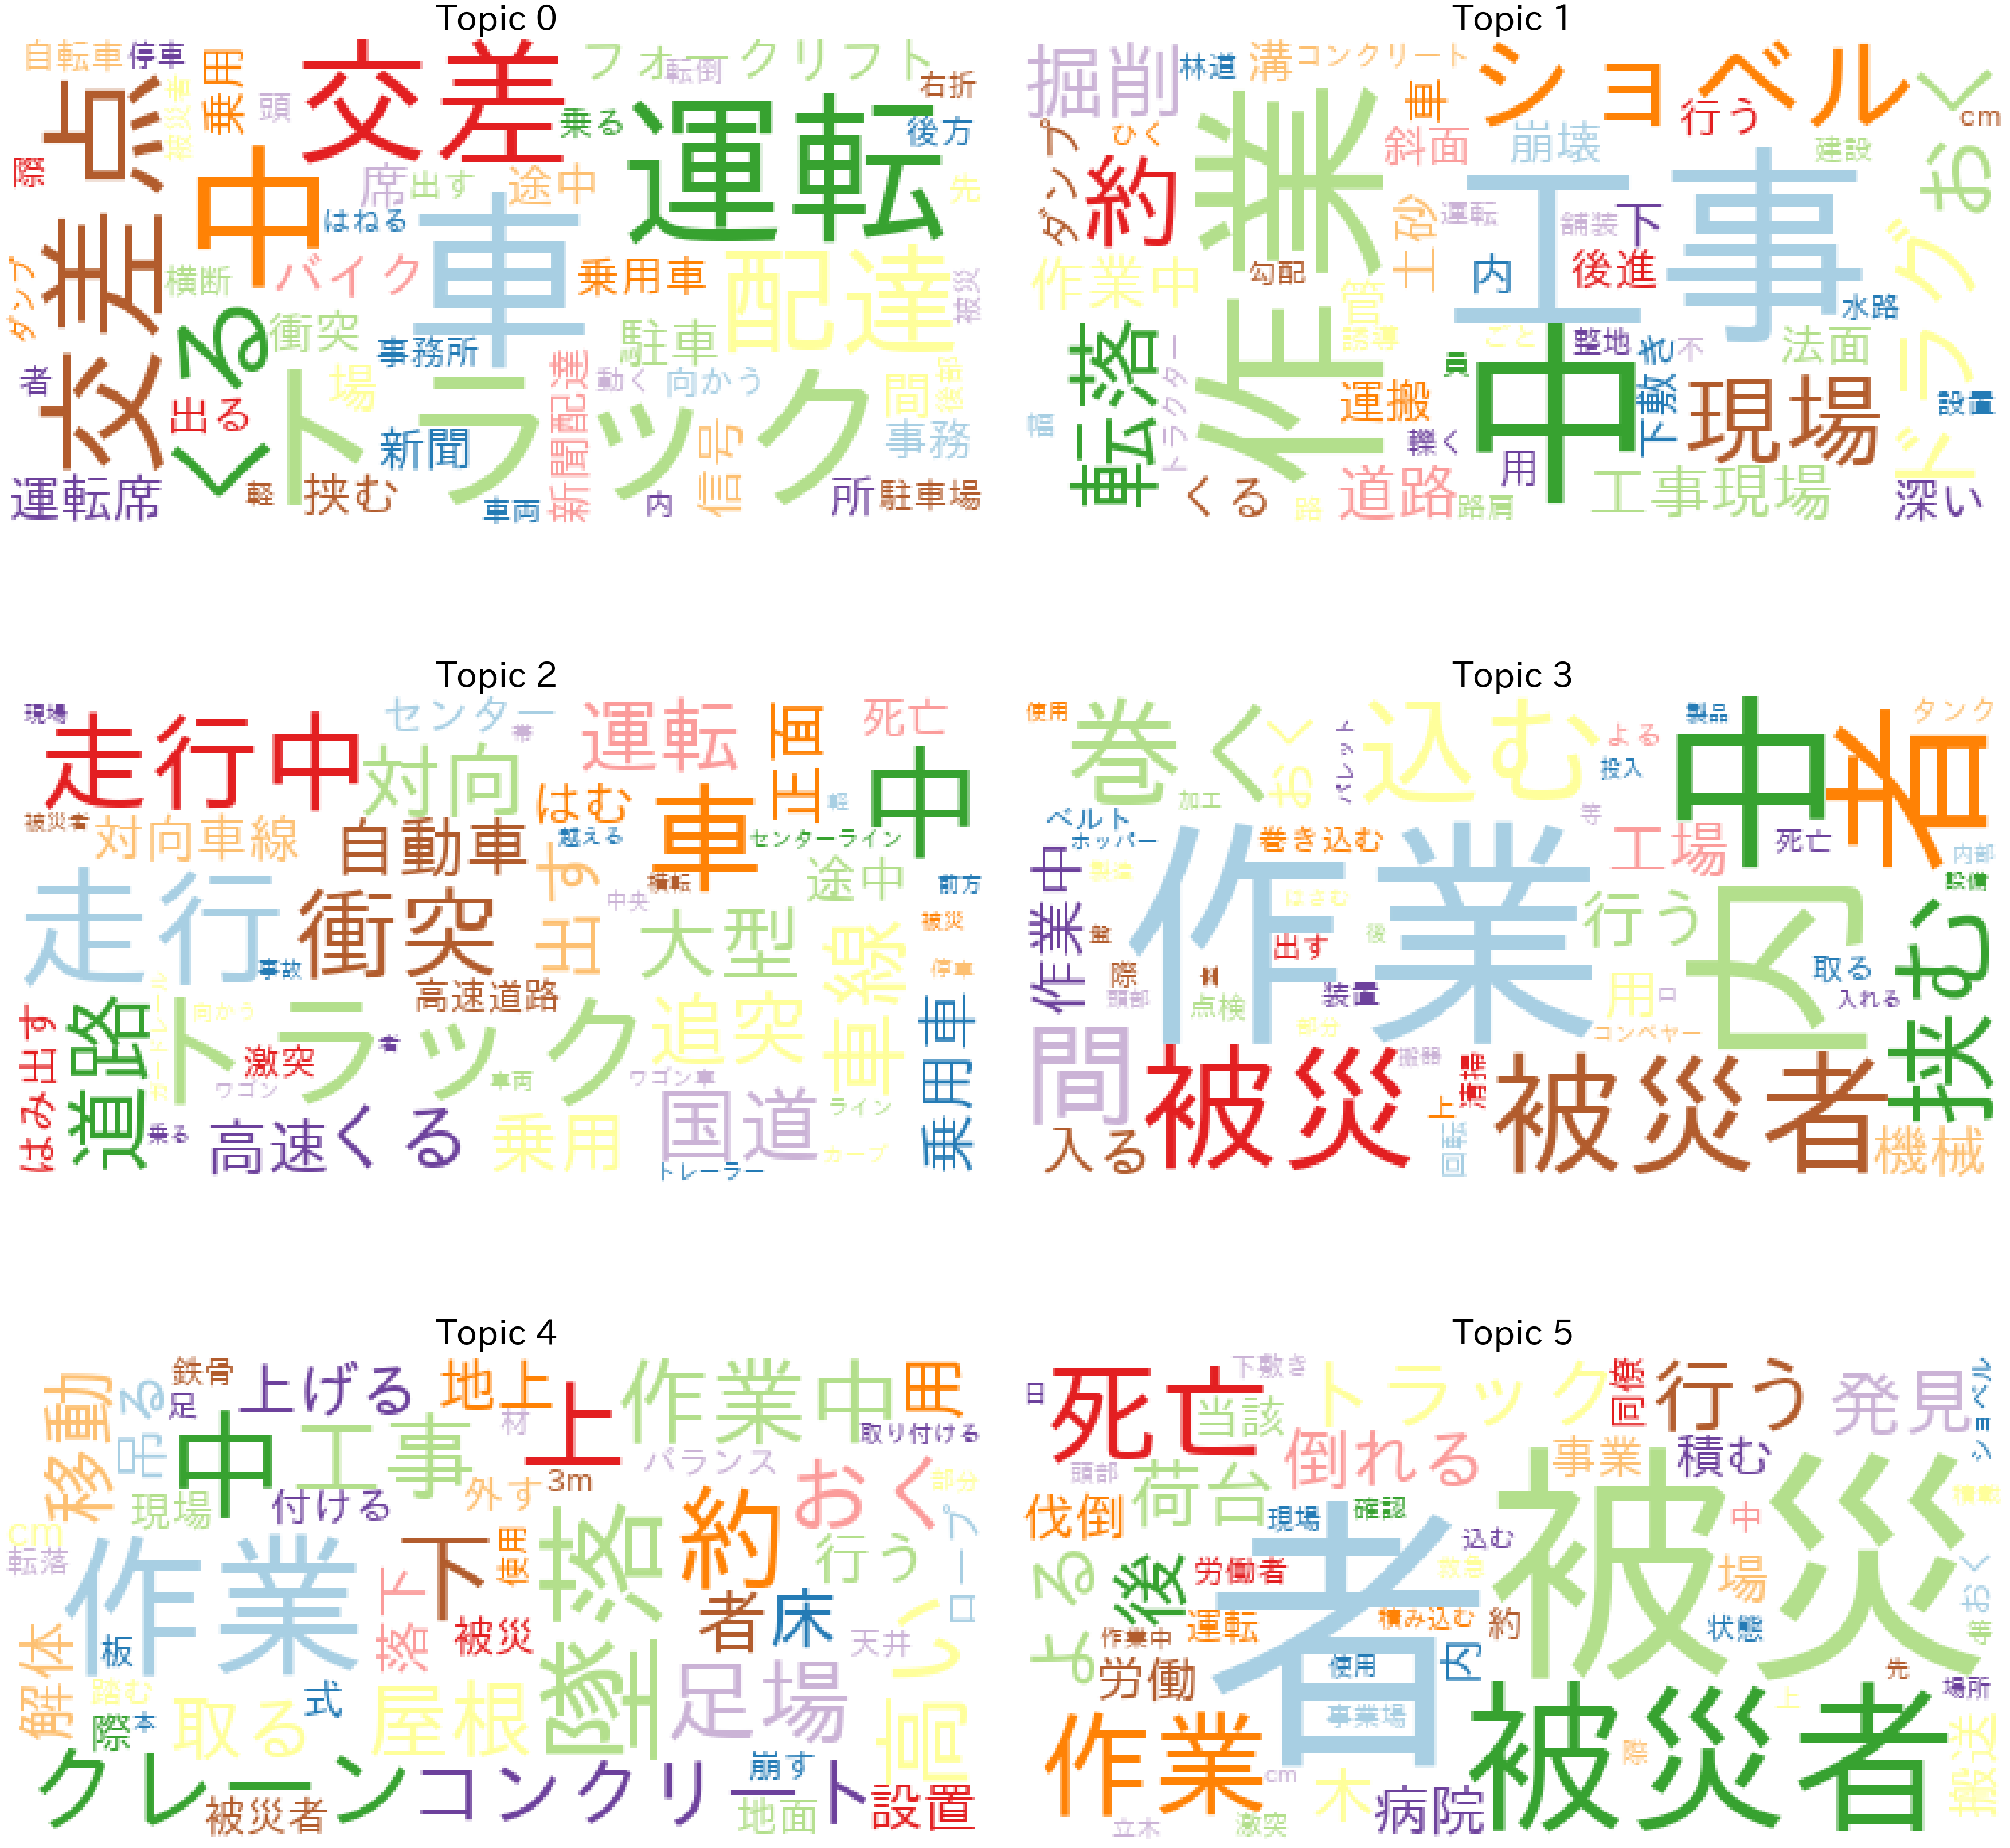

In [30]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["font.size"] = 50

fig, axs = plt.subplots(ncols=2, nrows=int(lda_model.num_topics/2), figsize=(50,50))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 50))
    im = WordCloud(
        font_path='/opt/anaconda3/envs/mhlw/lib/python3.6/site-packages/matplotlib/mpl-data/ipaexg.ttf',
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()

In [22]:
from tqdm import tqdm
import gensim
from gensim import corpora
from collections import defaultdict

start = 2
limit = 22
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

100%|██████████| 20/20 [08:12<00:00, 24.64s/it]


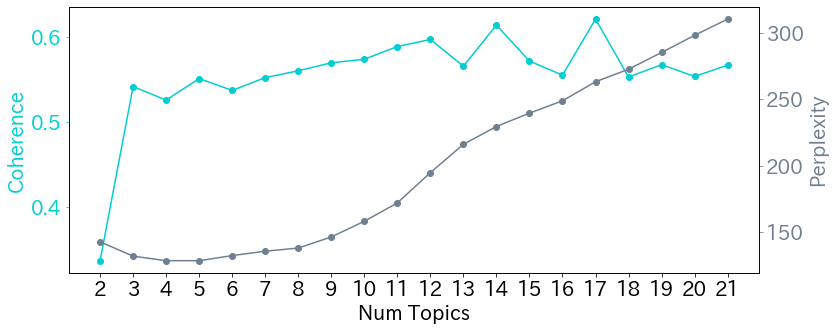

In [23]:
# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["font.size"] = 20

x = range(start, limit, step)

fig, ax1 = plt.subplots(figsize=(12,5))

# coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Vis PCoA
lda_model = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary)
vis_pcoa = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis_pcoa

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.203905 -0.071571       1        1  10.626041
1     -0.029157  0.221399       2        1  10.850556
2      0.288353  0.032945       3        1  15.309499
3     -0.172877 -0.124640       4        1  18.255407
4     -0.220721  0.092835       5        1  26.066908
5     -0.069503 -0.150967       6        1  18.891594, topic_info=     Category          Freq  Term         Total  loglift  logprob
88    Default  23271.000000     者  23271.000000  30.0000  30.0000
1807  Default  19431.000000    被災  19431.000000  29.0000  29.0000
207   Default   7960.000000    走行   7960.000000  28.0000  28.0000
1808  Default  18653.000000   被災者  18653.000000  27.0000  27.0000
91    Default  13205.000000  トラック  13205.000000  26.0000  26.0000
...       ...           ...   ...           ...      ...      ...
325    Topic6   1248.424316    運転   7444.187988  -0.1191  -5.1543
89     Topic6   1237.240356    おく   8721.601562  -0.2865  -5.1633
153    Topic6   1199.518311     約   9811.277344  -0.4352  -5.1943
21     Topic6   1234.730591     中  24032.810547  -1.3021  -5.1654
111    Topic6    929.185059    込む   3992.808350   0.2085  -5.4497

[492 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
279       4  0.003342     h
279       5  0.991370     h
279       6  0.005569     h
1817      2  0.993695     u
89        1  0.048844    おく
...     ...       ...   ...
115       4  0.073477    高い
115       5  0.822752    高い
115       6  0.058782    高い
345       3  0.999153    高速
346       3  0.999217  高速道路

[1262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

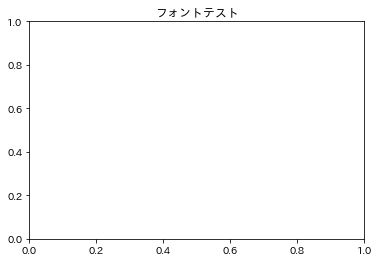

In [1]:
# フォント表示確認用

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

#print(mpl.get_configdir())
#print(mpl.get_cachedir())
fonts = fm.findSystemFonts()

#print(mpl.matplotlib_fname())

mpl.font_manager._rebuild()

plt.rcParams['font.family'] = 'IPAexGothic'
plt.title('フォントテスト')
plt.show()